In [1]:
%run -n main.py
lines = read_lines(DOTENV_PATH)
pairs = parse_dotenv(lines)
os.environ.update(pairs)
%run -n main.py

# rsg scores var

[Text(0, 0, 'RCB'),
 Text(0, 1, 'PARus'),
 Text(0, 2, 'MuSeRC'),
 Text(0, 3, 'TERRa'),
 Text(0, 4, 'RUSSE'),
 Text(0, 5, 'RWSD'),
 Text(0, 6, 'DaNetQA'),
 Text(0, 7, 'RuCoS')]

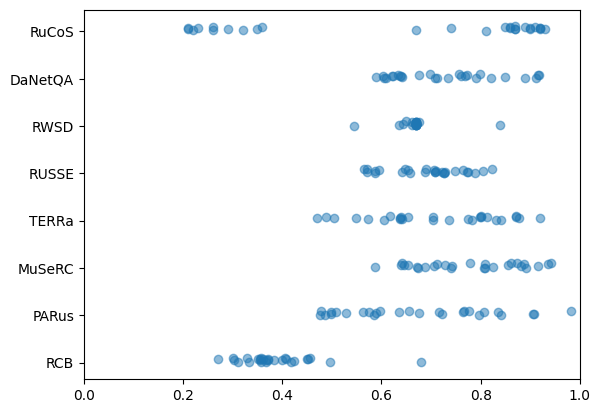

In [441]:
%run -n main.py
table = pd.DataFrame(RSG_LB)

xs, ys = [], []
tasks = ['RCB', 'PARus', 'MuSeRC', 'TERRa', 'RUSSE', 'RWSD', 'DaNetQA', 'RuCoS']
for task_index, task in enumerate(tasks):
    for score in table[task]:
        xs.append(score)
        ys.append(task_index + random.random() / 10)

fig, ax = plt.subplots()
ax.scatter(xs, ys, alpha=0.5)
ax.set_xlim(0, 1)
ax.set_yticks(range(len(tasks)))
ax.set_yticklabels(tasks)

# tasks

## terra

In [ ]:
path = 'data/rsg/TERRa/val.jsonl'
lines = read_lines(path)
items = list(parse_jsonl(lines))

In [ ]:
random.seed(0)
items = (
    random.sample([_ for _ in items if _['label'] == 'entailment'], 50)
    + random.sample([_ for _ in items if _['label'] == 'not_entailment'], 50)
)
random.shuffle(items)
for item in items:
    item['id'] = item.pop('idx')

In [ ]:
lines = format_jsonl(items)
write_lines('tasks/terra.jsonl', lines)

## danetqa

In [ ]:
path = 'data/rsg/DaNetQA/val.jsonl'
lines = read_lines(path)
items = list(parse_jsonl(lines))

In [ ]:
random.seed(0)
items = (
    random.sample([_ for _ in items if _['label'] is True], 50)
    + random.sample([_ for _ in items if _['label'] is False], 50)
)
random.shuffle(items)
for item in items:
    item['id'] = item.pop('idx')

In [ ]:
lines = format_jsonl(items)
write_lines('tasks/danetqa.jsonl', lines)

## parus

In [ ]:
path = 'data/rsg/PARus/val.jsonl'
lines = read_lines(path)
items = list(parse_jsonl(lines))

In [ ]:
random.seed(0)
items = (
    random.sample([_ for _ in items if _['question'] == 'effect'], 48)
    + random.sample([_ for _ in items if _['question'] == 'cause'], 52)
)
random.shuffle(items)
for item in items:
    item['id'] = item.pop('idx')

In [ ]:
lines = format_jsonl(items)
write_lines('tasks/parus.jsonl', lines)

## rwsd

In [55]:
path = 'data/rsg/RWSD/val.jsonl'
lines = read_lines(path)
items = list(parse_jsonl(lines))

In [67]:
random.seed(0)
items = (
    random.sample([_ for _ in items if _['label'] == True], 50)
    + random.sample([_ for _ in items if _['label'] == False], 50)
)
random.shuffle(items)
for item in items:
    item['id'] = item.pop('idx')

In [69]:
lines = format_jsonl(items)
write_lines('tasks/rwsd.jsonl', lines)

## russe

In [70]:
path = 'data/rsg/RUSSE/val.jsonl'
lines = read_lines(path)
items = list(parse_jsonl(lines))

In [77]:
random.seed(0)
items = (
    random.sample([_ for _ in items if _['label'] == True], 50)
    + random.sample([_ for _ in items if _['label'] == False], 50)
)
random.shuffle(items)
for item in items:
    item['id'] = item.pop('idx')

In [78]:
lines = format_jsonl(items)
write_lines('tasks/russe.jsonl', lines)

## rucola

In [403]:
path = 'data/rucola/out_of_domain_dev.csv'
items = list(read_csv(path))

In [404]:
random.seed(0)
items = (
    random.sample([_ for _ in items if _['acceptable'] == '0' and _['error_type'] == 'Hallucination'], 50)
    + random.sample([_ for _ in items if _['acceptable'] == '1'], 50)
)
random.shuffle(items)
for item in items:
    item['label'] = item.pop('acceptable')

In [405]:
lines = format_jsonl(items)
write_lines('tasks/rucola.jsonl', lines)

# eval apis

In [446]:
%run -n main.py
task = DANETQA
eval = f'17_curie_{task}'

In [447]:
%run -n main.py
lines = read_lines(f'tasks/{task}.jsonl')
task_items = list(parse_jsonl(lines))

In [464]:
%run -n main.py
task_item = random.choice(task_items)
prompt = TASK_PROMPTS[task](task_item)
print(prompt)

In [465]:
%run -n main.py
response = openai_completions(prompt, model=TEXT_CURIE_001, stop='---')
print(response)

In [455]:
path = Path(f'evals/{eval}.jsonl')
eval_items = []
if path.exists():
    lines = read_lines(path)
    eval_items.extend(parse_jsonl(lines))
len(eval_items)

12

In [468]:
%run -n main.py
cache_ids = {_['id'] for _ in eval_items}
nocache_task_items = [_ for _ in task_items if _['id'] not in cache_ids]

for task_item in log_progress(nocache_task_items):
    prompt = TASK_PROMPTS[task](task_item)

    response = openai_completions(prompt, model=TEXT_CURIE_001, stop='---')
    sleep(2)

    # response = openai_chat_completions(prompt, model=GPT_35_TURBO_0301, stop='---')
    # sleep(2)

    # response = cohere_generate(prompt, end_sequences=['---'])
    # sleep(12)

    eval_items.append({
        'id': task_item['id'],
        'response': response
    })


In [452]:
eval_items

[{'id': 270, 'response': 'Yes'},
 {'id': 734, 'response': '\n\nNo'},
 {'id': 219, 'response': '\n\nNo'},
 {'id': 124, 'response': 'суффикс ин'},
 {'id': 377, 'response': 'No'},
 {'id': 66, 'response': 'No'},
 {'id': 817, 'response': '\n\nYes'},
 {'id': 343, 'response': '\n\nYes'},
 {'id': 732, 'response': 'Yes'},
 {'id': 289, 'response': 'No'},
 {'id': 641, 'response': 'Yes'},
 {'id': 95, 'response': 'Yes'}]

In [453]:
[_['label'] for _ in task_items[:10]]

[False, False, False, True, False, False, True, True, False, False]

In [461]:
lines = format_jsonl(eval_items)
write_lines(f'evals/{eval}.jsonl', lines)

# score

In [463]:
%run -n main.py
model_task_evals = [
    (TEXT_DAVINCHI_003, TERRA, '01_davinci_terra'),
    (TEXT_DAVINCHI_003, DANETQA, '02_davinci_danetqa'),
    (TEXT_DAVINCHI_003, PARUS, '03_davinci_parus'),
    (GPT_35_TURBO_0301, PARUS, '04_turbo_parus'),
    (GPT_35_TURBO_0301, DANETQA, '05_turbo_danetqa'),
    (GPT_35_TURBO_0301, TERRA, '06_turbo_terra'),
    (COHERE_XLARGE, PARUS, '07_cohere_parus'),
    (COHERE_XLARGE, DANETQA, '08_cohere_danetqa'),
    (COHERE_XLARGE, TERRA, '09_cohere_terra'),
    (GPT_35_TURBO_0301, RWSD, '12_turbo_rwsd'),
    (GPT_35_TURBO_0301, RUSSE, '13_turbo_russe'),
    (GPT_35_TURBO_0301, RUCOLA, '14_turbo_rucola'),
    (TEXT_CURIE_001, PARUS, '15_curie_parus'),
    (TEXT_CURIE_001, TERRA, '16_curie_terra'),
    (TEXT_CURIE_001, DANETQA, '17_curie_danetqa'),
]
data = []
for model, task, eval in model_task_evals:
    lines = read_lines(f'tasks/{task}.jsonl')
    id_targets = {
        _['id']: _['label']
        for _ in parse_jsonl(lines)
    }
    
    lines = read_lines(f'evals/{eval}.jsonl')
    norm_response = NORM_RESPONSES[task]
    id_preds = {
        _['id']: norm_response(_['response'])
        for _ in parse_jsonl(lines)
    }
    score = acc_score(id_targets, id_preds)
    data.append((model, task, score))
data

[('text-davinci-003', 'terra', (0.91, 0)),
 ('text-davinci-003', 'danetqa', (0.79, 0)),
 ('text-davinci-003', 'parus', (0.93, 0)),
 ('gpt-3.5-turbo-0301', 'parus', (0.9130434782608695, 8)),
 ('gpt-3.5-turbo-0301', 'danetqa', (0.8350515463917526, 3)),
 ('gpt-3.5-turbo-0301', 'terra', (0.86, 0)),
 ('xlarge', 'parus', (0.54, 0)),
 ('xlarge', 'danetqa', (0.5, 0)),
 ('xlarge', 'terra', (0.72, 0)),
 ('gpt-3.5-turbo-0301', 'rwsd', (0.79, 0)),
 ('gpt-3.5-turbo-0301', 'russe', (0.68, 0)),
 ('gpt-3.5-turbo-0301', 'rucola', (0.53, 0)),
 ('text-curie-001', 'parus', (0.6, 0)),
 ('text-curie-001', 'terra', (0.57, 0)),
 ('text-curie-001', 'danetqa', (0.7093023255813954, 1))]